In [222]:
import pandas as pd
import numpy as np
from numpy import errstate,isneginf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
df = pd.read_csv('properties_2016.csv')

In [224]:
df.describe(include='all').transpose().sort_values(by='count')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
storytypeid,1624,NaN,NaN,NaN,7,0,7,7,7,7,7
basementsqft,1628,NaN,NaN,NaN,646.883,538.793,20,272,534,847.25,8516
yardbuildingsqft26,2647,NaN,NaN,NaN,278.297,369.732,10,96,168,320,6141
fireplaceflag,5163,1,True,5163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid,6061,NaN,NaN,NaN,7.20261,2.43629,2,7,7,7,27
typeconstructiontypeid,6747,NaN,NaN,NaN,5.99956,0.38405,4,6,6,6,13
finishedsquarefeet13,7672,NaN,NaN,NaN,1178.9,357.073,120,960,1296,1440,2688
buildingclasstypeid,12629,NaN,NaN,NaN,3.72595,0.5017,1,3,4,4,5
decktypeid,17096,NaN,NaN,NaN,66,0,66,66,66,66,66
finishedsquarefeet6,22001,NaN,NaN,NaN,2414.34,7695.3,117,1079,1992,3366,952576


In [225]:
# Drop columns that are sparesely populated (and it doesn't make sense that they are, e.g. don't drop fireplaces)
df.drop(labels=['storytypeid','basementsqft','yardbuildingsqft26','architecturalstyletypeid',
                'architecturalstyletypeid','finishedsquarefeet13','buildingclasstypeid','finishedsquarefeet6',
               'finishedsquarefeet15','finishedsquarefeet50','finishedfloor1squarefeet'], axis=1,inplace=True)

# drop categorical columns for now (may want to explode out some of them)
df.drop(labels=['airconditioningtypeid', 'buildingqualitytypeid', 'decktypeid', 'fips', 'heatingorsystemtypeid', 
                'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 
                'regionidneighborhood', 'regionidzip', 'typeconstructiontypeid', 'censustractandblock'], 
        axis=1,inplace=True)

# Drop those with no variation or those covered by other categories
df.drop(labels=['propertycountylandusecode', 'propertyzoningdesc','fireplaceflag','assessmentyear','taxdelinquencyyear'], 
        axis=1,inplace=True)

df.set_index(keys='parcelid',inplace=True)

In [226]:
df.dtypes.transpose()

bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
poolsizesum                     float64
pooltypeid10                    float64
pooltypeid2                     float64
pooltypeid7                     float64
roomcnt                         float64
threequarterbathnbr             float64
unitcnt                         float64
yardbuildingsqft17              float64
yearbuilt                       float64
numberofstories                 float64
structuretaxvaluedollarcnt      float64


In [227]:
def convert_yn(x):
    if x in ['True','Y']:
        return 1
    return 0

df['hashottuborspa'] = df['hashottuborspa'].map(convert_yn)
df['taxdelinquencyflag'] = df['taxdelinquencyflag'].map(convert_yn)

In [228]:
#changed_dtype = {'airconditioningtypeid': 'category', 'buildingqualitytypeid': 'category', 'decktypeid': 'category',
#                 'fips': 'category', 'heatingorsystemtypeid': 'category', 'propertylandusetypeid': 'category',
#                 'rawcensustractandblock': 'category', 'regionidcity': 'category', 'regionidcounty': 'category',
#                 'regionidneighborhood':'category', 'regionidzip': 'category', 'typeconstructiontypeid': 'category',
#                 'censustractandblock': 'category'}

#df = df.astype(dtype=changed_dtype,copy=False)

In [229]:
df.shape
df.describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,...,threequarterbathnbr,unitcnt,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag
count,2.973755e+06,2.973767e+06,2.856305e+06,2.929652e+06,2.709184e+06,312637.000000,2.856305e+06,883267.000000,883267.000000,2985217.0,...,311631.000000,1.977490e+06,80355.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.917484e+06,2.953967e+06,2.985217e+06
mean,2.209143e+00,3.088949e+00,2.299263e+00,1.827162e+03,1.760001e+03,1.168710,2.244165e+00,1.823517,383.769357,0.0,...,1.010009,1.181171e+00,319.803397,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.524780e+05,5.377607e+03,1.891387e-02
std,1.077754e+00,1.275859e+00,1.000736e+00,1.819780e+03,9.710610e+02,0.461273,9.912054e-01,0.610035,245.443419,0.0,...,0.117709,2.447896e+00,233.086314,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,4.450132e+05,9.183107e+03,1.362209e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.0,...,1.000000,1.000000e+00,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.340000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,2.000000e+00,1.213000e+03,1.196000e+03,1.000000,2.000000e+00,2.000000,324.000000,0.0,...,1.000000,1.000000e+00,190.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,7.483600e+04,2.461070e+03,0.000000e+00
50%,2.000000e+00,3.000000e+00,2.000000e+00,1.572000e+03,1.539000e+03,1.000000,2.000000e+00,2.000000,441.000000,0.0,...,1.000000,1.000000e+00,270.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,1.670420e+05,3.991780e+03,0.000000e+00
75%,3.000000e+00,4.000000e+00,3.000000e+00,2.136000e+03,2.070000e+03,1.000000,3.000000e+00,2.000000,494.000000,0.0,...,1.000000,1.000000e+00,390.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,3.069180e+05,6.201005e+03,0.000000e+00
max,2.000000e+01,2.000000e+01,2.000000e+01,9.525760e+05,2.903450e+05,9.000000,2.000000e+01,25.000000,7749.000000,0.0,...,7.000000,9.970000e+02,7983.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,9.024622e+07,3.458861e+06,1.000000e+00


In [230]:
# Transform any columns with very large st dev to log
with errstate(divide='ignore'):
    df['structuretaxvaluedollarcnt'] = np.log10(df['structuretaxvaluedollarcnt'])
    df['taxvaluedollarcnt'] = np.log10(df['taxvaluedollarcnt'])
    df['landtaxvaluedollarcnt'] = np.log10(df['landtaxvaluedollarcnt'])
    df['taxamount'] = np.log10(df['taxamount'])
    df['lotsizesquarefeet'] = np.log10(df['lotsizesquarefeet'])
    df['garagetotalsqft'] = np.log10(df['garagetotalsqft'])

In [231]:
df['structuretaxvaluedollarcnt'][isneginf(df['structuretaxvaluedollarcnt'])]=0
df['taxvaluedollarcnt'][isneginf(df['taxvaluedollarcnt'])]=0
df['landtaxvaluedollarcnt'][isneginf(df['landtaxvaluedollarcnt'])]=0
df['taxamount'][isneginf(df['taxamount'])]=0
df['lotsizesquarefeet'][isneginf(df['lotsizesquarefeet'])]=0
df['garagetotalsqft'][isneginf(df['garagetotalsqft'])]=0

C:\Users\amybr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\amybr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\amybr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\amybr\Anac

In [232]:
labels = pd.read_csv('train_2016_v2.csv')

In [233]:
labels.transactiondate = pd.to_datetime(labels.transactiondate, infer_datetime_format=True)
labels.set_index(keys='parcelid',inplace=True)
print(labels.shape)
print(labels.dtypes)

(90275, 2)
logerror                  float64
transactiondate    datetime64[ns]
dtype: object


In [234]:
# Create the train and dev subsets from 2016 data
df = df.merge(labels,how='inner',left_index=True,right_index=True, copy='False')

In [235]:
df.fillna(0,inplace=True)

In [236]:
# Split the dataset into train and dev
df = shuffle(df)
train_data, train_labels = df.iloc[int(len(df)/2):, 0:29], df.iloc[int(len(df)/2):, 29:30].values
df_train = df.iloc[int(len(df)/2):, :]
dev_data, dev_labels = df.iloc[:int(len(df)/2), 0:29], df.iloc[:int(len(df)/2), 29:30].values

In [237]:
print(train_data.shape)

(45138, 29)


In [238]:
def plt_hist(df,row,col,cnt):
    fig, ax = plt.subplots(row,col, figsize=(15,15))
    ax = ax.flatten()
    i = 0
    for c in df.columns:
        ax[i].hist(df[c])
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
        ax[i].set_title(c)
        i+=1
    if cnt < row*col:
        for i in range(cnt,row*col):
            plt.delaxes(ax[i])
    plt.tight_layout()
    plt.show()

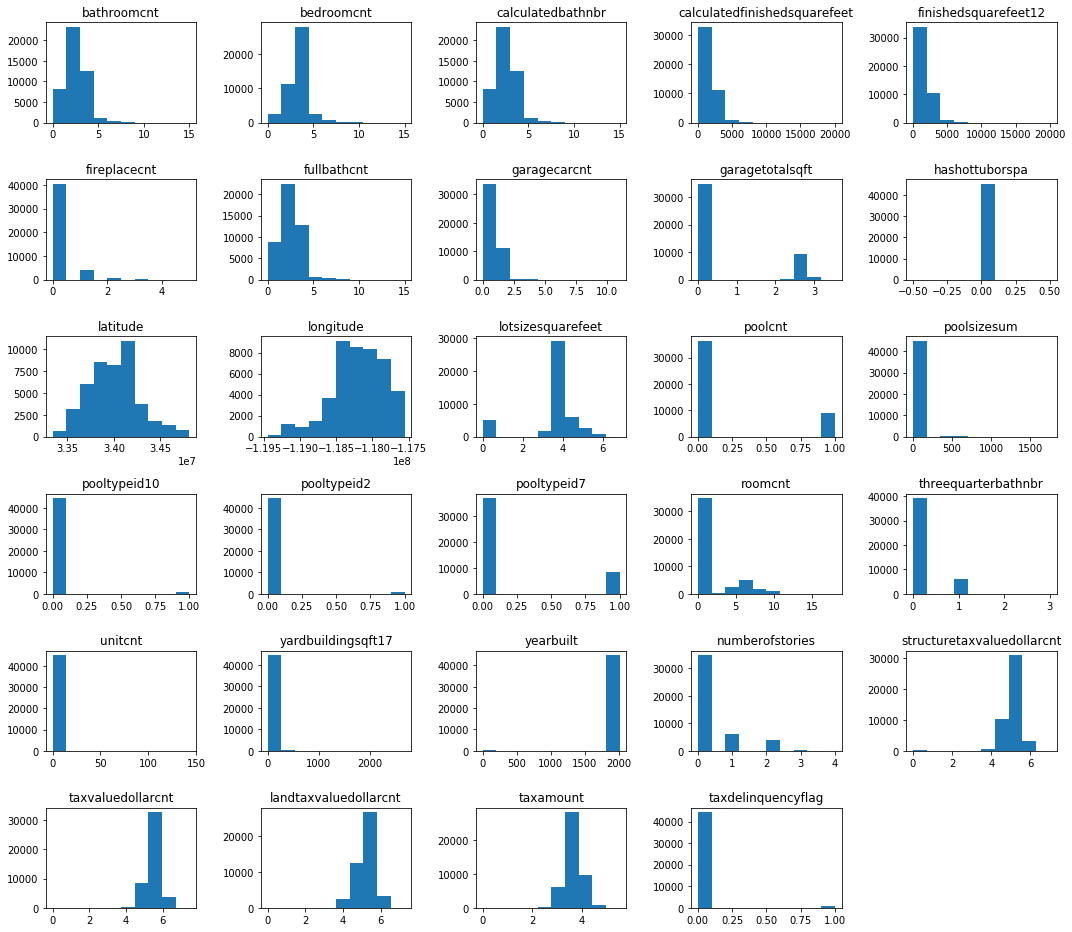

In [239]:
plt_hist(df_train,7,5,len(df_train.columns)-2)

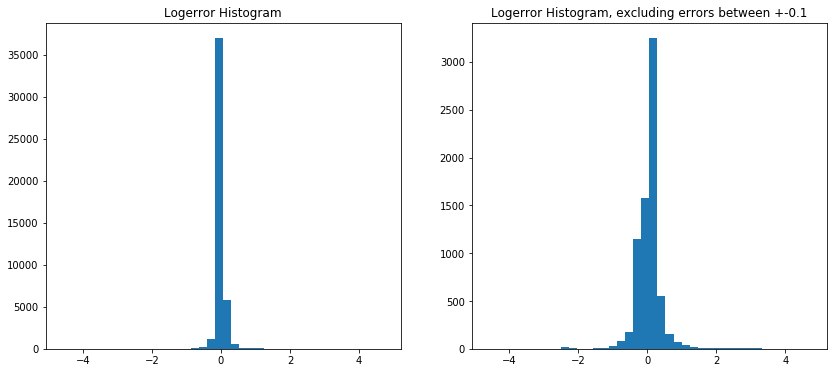

In [240]:
# Histograms of Logerrors
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax.flatten()
ax[0].hist(df_train.logerror,bins=40)
ax[0].set_title("Logerror Histogram")
ax[1].hist(df_train.logerror[np.abs(df_train.logerror) >= 0.1],bins=40)
ax[1].set_title("Logerror Histogram, excluding errors between +-0.1")
plt.show()

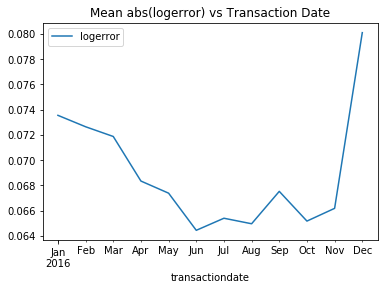

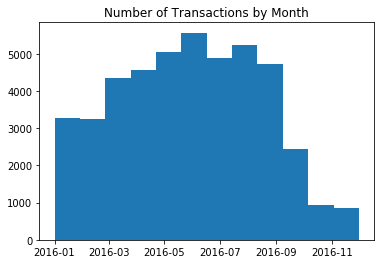

In [241]:
# Logerrors over time
plt_df = df_train[['transactiondate','logerror']].copy()
plt_df['transactiondate'] = plt_df.transactiondate.astype('datetime64[M]')
plt_df['logerror'] = np.abs(plt_df.logerror)
g = plt_df.groupby(['transactiondate']).mean()
g.plot()
plt.title("Mean abs(logerror) vs Transaction Date")
plt.show()
plt.hist(plt_df.transactiondate,bins=12)
plt.title("Number of Transactions by Month")
plt.show()

In [249]:
new_df = df_train.copy()
new_df['transactiondate'] = new_df.transactiondate.astype('datetime64[M]')
new_df['abs_logerror'] = np.abs(new_df.logerror)
new_df = new_df[new_df.transactiondate == '2016-12-01']
new_df.sort_values(by=['abs_logerror'],inplace=True, ascending=False)
new_df.head(8).transpose()

parcelid,11557016,12521809,17153910,14448519,11579451,12182421,13991565,13874008
bathroomcnt,2,2,3,2,2,1,2,0
bedroomcnt,3,3,4,3,3,2,2,0
calculatedbathnbr,2,2,3,2,2,1,2,0
calculatedfinishedsquarefeet,1417,994,3096,1549,1843,1040,1197,3071
finishedsquarefeet12,1417,994,3096,1549,1843,1040,1197,0
fireplacecnt,0,0,2,0,0,0,1,0
fullbathcnt,2,2,3,2,2,1,2,0
garagecarcnt,0,0,2,0,0,0,2,0
garagetotalsqft,0,0,2.84261,0,0,0,2.60206,0
hashottuborspa,0,0,0,0,0,0,0,0
